<a href="https://colab.research.google.com/github/sedavasema/mohammad/blob/main/Gamma_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Histogram analysis

In [2]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/input.jpg

--2023-07-05 10:09:55--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/input.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308772 (302K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>] 301.54K  --.-KB/s    in 0.005s  

2023-07-05 10:09:55 (62.3 MB/s) - ‘input.jpg’ saved [308772/308772]



In [14]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/room-light.jpg

--2023-07-05 11:06:35--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/room-light.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 512433 (500K) [image/jpeg]
Saving to: ‘room-light.jpg’

room-light.jpg      100%[===================>] 500.42K  --.-KB/s    in 0.007s  

2023-07-05 11:06:35 (65.8 MB/s) - ‘room-light.jpg’ saved [512433/512433]



In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
image=cv2.imread('./input.jpg')
new_image=np.zeros(image.shape,image.dtype)
alpha=float(input('Enter the alpha value [0.1-3.0]:  '))
beta=int(input('Enter the beta value [-70 100]: '))
new_image=cv2.convertScaleAbs(image,alpha=alpha,beta=beta)
new_image2=cv2.convertScaleAbs(image-1,alpha=alpha//2,beta=beta)
gray_image =  cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_new_image = cv2.cvtColor(new_image, cv2.COLOR_BGR2GRAY)
gray_new_image2 = cv2.cvtColor(new_image2, cv2.COLOR_BGR2GRAY)

Enter the alpha value [0.1-3.0]:  2
Enter the beta value [-70 100]: -100


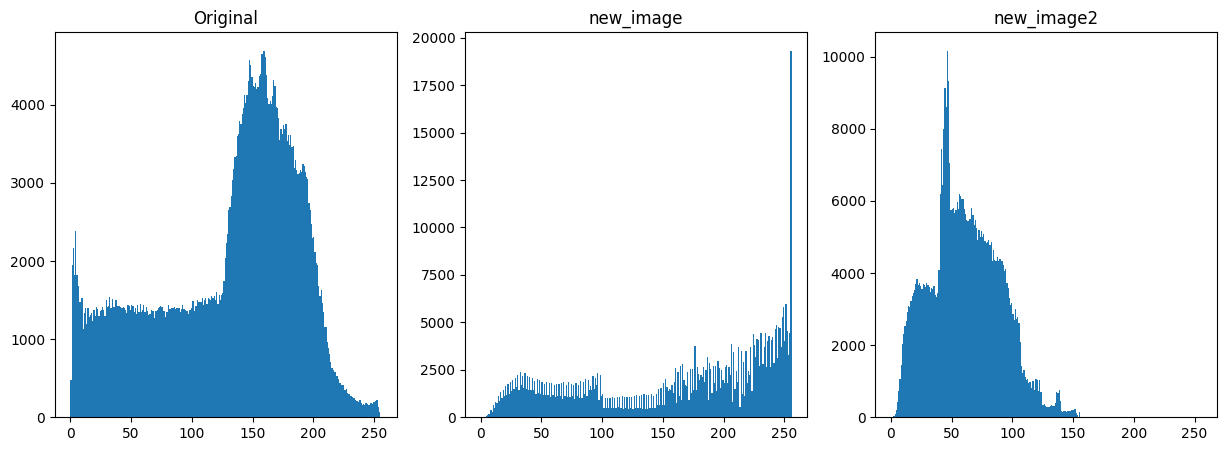

In [13]:
plt.figure(figsize=[15,5])
plt.subplot(131);plt.hist(gray_image.ravel(),256,[0,256]);plt.title("Original");
plt.subplot(132);plt.hist(gray_new_image.ravel(),256,[0,256]);plt.title("new_image");
plt.subplot(133);plt.hist(gray_new_image2.ravel(),256,[0,256]);plt.title("new_image2");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تنظیم روشنایی و کنتراست(با تصحیح گاما)</div>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
تصحیح گاما را می توان برای تصحیح روشنایی یک تصویر با استفاده از تبدیل غیر خطی بین مقادیر ورودی و مقادیر خروجی نگاشت شده استفاده کرد:</div>
<br/>

$$O = \left( \frac{I}{255} \right)^{\gamma} \times 255$$

<br/>
<div style="direction:rtl;text-align:right;font-family:Tahoma">
از آنجایی که این رابطه غیر خطی است، اثر برای همه پیکسل ها یکسان نخواهد بود و به مقدار اصلی آنها بستگی دارد.
</div>

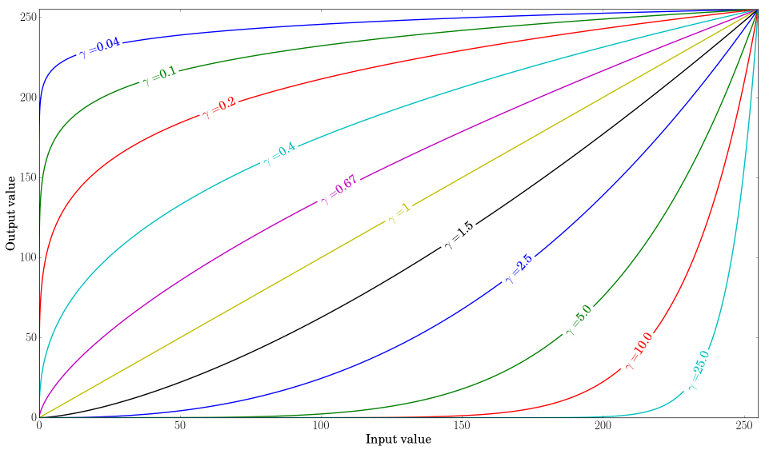

<div style="direction:rtl;text-align:right;font-family:Tahoma">
وقتی
$$\gamma < 1$$
مناطق تاریک اصلی روشن تر خواهند بود و هیستوگرام به سمت راست منتقل می شود در حالی که با
$$\gamma > 1$$
برعکس خواهد بود.
</div>

<div style="direction:ltr;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">تصحیح یک تصویر کم نور یا underexposed image</div>


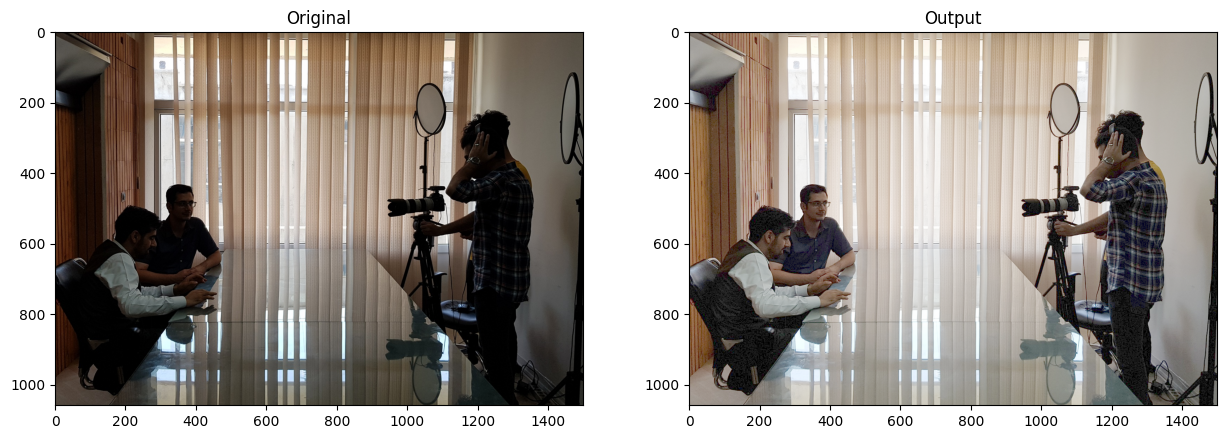

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

img_original = cv2.imread("./room-light.jpg")
lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
out = cv2.LUT(img_original, lookUpTable)


plt.figure(figsize=[15,5])
plt.subplot(121);plt.imshow(img_original[...,::-1]);plt.title("Original");
plt.subplot(122);plt.imshow(out[...,::-1]);plt.title("Output");

# <div style="direction:rtl;text-align:right;font-family:B Lotus, B Nazanin, Tahoma">مقایسه این روش با روش قبل</div>

In [16]:
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/aa.jpg
!wget https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/asalooye.jpg

--2023-07-05 11:20:19--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/aa.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1954842 (1.9M) [image/jpeg]
Saving to: ‘aa.jpg’

aa.jpg              100%[===================>]   1.86M  --.-KB/s    in 0.01s   

2023-07-05 11:20:19 (161 MB/s) - ‘aa.jpg’ saved [1954842/1954842]

--2023-07-05 11:20:19--  https://raw.githubusercontent.com/sedavasema/one-shot-learning/main/mydataset/asalooye.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2101061 (2.0M) [i

In [19]:
??cv2.LUT

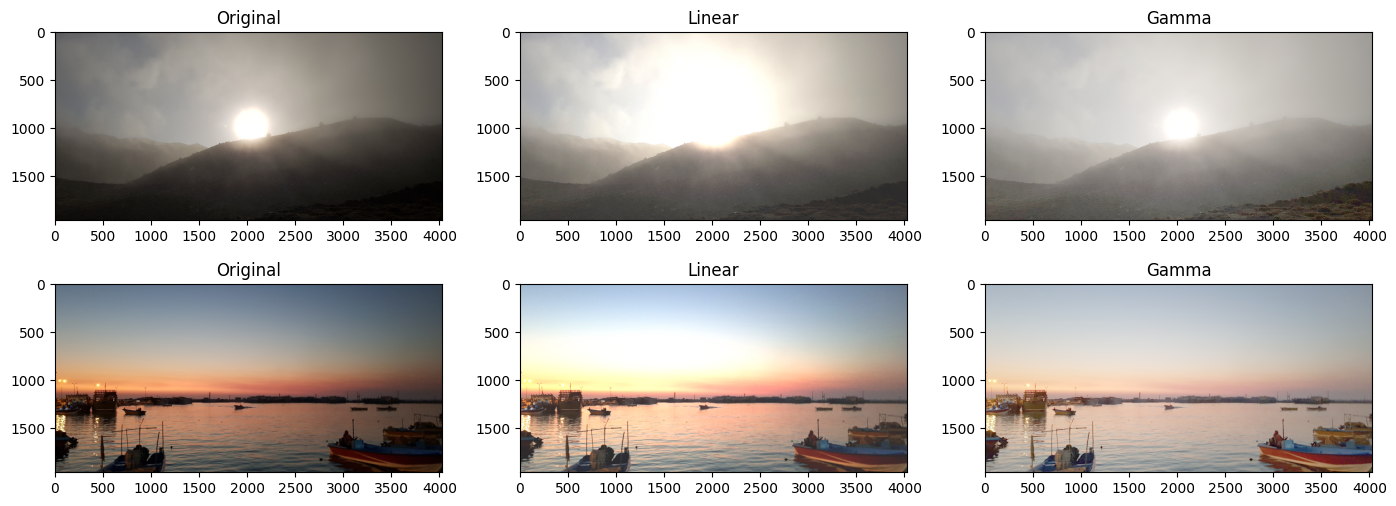

In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.4

img_original1 = cv2.imread("./aa.jpg")
img_original2 = cv2.imread("./asalooye.jpg")
output_linear1 = cv2.convertScaleAbs(img_original1, alpha=1.3, beta=40)
output_linear2 = cv2.convertScaleAbs(img_original2, alpha=1.3, beta=40)

lookUpTable = np.empty((1,256), np.uint8)

for i in range(256):
    lookUpTable[0,i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)

output_gammacorrected1 = cv2.LUT(img_original1, lookUpTable)
output_gammacorrected2 = cv2.LUT(img_original2, lookUpTable)


plt.figure(figsize=[17,6])
plt.subplot(231);plt.imshow(img_original1[...,::-1]);plt.title("Original");
plt.subplot(232);plt.imshow(output_linear1[...,::-1]);plt.title("Linear");
plt.subplot(233);plt.imshow(output_gammacorrected1[...,::-1]);plt.title("Gamma");

plt.subplot(234);plt.imshow(img_original2[...,::-1]);plt.title("Original");
plt.subplot(235);plt.imshow(output_linear2[...,::-1]);plt.title("Linear");
plt.subplot(236);plt.imshow(output_gammacorrected2[...,::-1]);plt.title("Gamma");

ُSource: https://docs.opencv.org/4.6.0/d3/dc1/tutorial_basic_linear_transform.html